<h2>Data Analysis using Classification methods</h2>

In [442]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, re, seaborn as sb, zipfile

In [443]:
job_change_test = pd.read_csv("./ML2023/job_change/job_change_test.zip", compression='zip')
job_change_train = pd.read_csv("./ML2023/job_change/job_change_train.zip", compression='zip')

In [444]:
job_change_test.dtypes

id                          int64
gender                     object
age                         int64
education                  object
field_of_studies           object
is_studying                object
county                     object
relative_wage             float64
years_since_job_change     object
years_of_experience        object
hours_of_training           int64
is_certified                int64
size_of_company            object
type_of_company            object
dtype: object

In [445]:
job_change_train.dtypes

id                          int64
gender                     object
age                         int64
education                  object
field_of_studies           object
is_studying                object
county                     object
relative_wage             float64
years_since_job_change     object
years_of_experience        object
hours_of_training           int64
is_certified                int64
size_of_company            object
type_of_company            object
willing_to_change_job      object
dtype: object

In [446]:
print(f'Job change train dataset length is: {len(job_change_train.dtypes)} while Job change test dataset length is: {len(job_change_test.dtypes)})')

Job change train dataset length is: 15 while Job change test dataset length is: 14)


In [447]:
missing_count = job_change_train.isna().sum()
missing_count

id                        0
gender                    0
age                       0
education                 0
field_of_studies          0
is_studying               0
county                    0
relative_wage             0
years_since_job_change    0
years_of_experience       0
hours_of_training         0
is_certified              0
size_of_company           0
type_of_company           0
willing_to_change_job     0
dtype: int64

Our model is free of missing data bricks so we can go on with analysis.

In [448]:
X_train = job_change_train.drop(['willing_to_change_job','id', 'size_of_company'], axis=1)
X_test = job_change_test.drop(['id', 'size_of_company'], axis=1)
y_true = job_change_train['willing_to_change_job']

<h3>Data transformation stage</h3>

In [449]:
X_train

,gender,age,education,field_of_studies,is_studying,county,relative_wage,years_since_job_change,years_of_experience,hours_of_training,is_certified,type_of_company
0,Male,22,higher_BSc,science,no,county_118,162.84,1,2,18,1,private_company
1,Male,27,higher_BSc,science,no,county_028,151.34,1,6,24,1,private_company
2,Male,38,higher_BSc,science,no,county_031,114.17,1,13,96,1,startup_with_funding
3,Unknown,47,higher_BSc,science,no,county_080,123.55,>4,>20,36,1,private_company
4,Male,28,higher_BSc,science,no,county_118,162.84,1,5,106,1,private_company
...,...,...,...,...,...,...,...,...,...,...,...,...
12422,Male,27,secondary,no_information,full_time,county_084,98.24,never_changed,2,34,0,no_information
12423,Male,31,higher_BSc,science,no,county_059,110.45,1,7,116,1,private_company
12424,Male,47,Phd,science,no,county_118,162.84,never_changed,>20,144,1,private_company
12425,Male,24,higher_BSc,science,no,county_059,110.45,never_changed,5,100,1,private_company


In [450]:
pd.unique(X_train['field_of_studies'])

array(['science', 'no_information', 'other', 'humanities', 'business',
       'arts'], dtype=object)

In [451]:
X_train[['field_of_studies', 'education', 'is_studying', 'county', 'gender', 'type_of_company']] = X_train[['field_of_studies', 'education', 'is_studying', 'county', 'gender', 'type_of_company']].apply(lambda x: pd.factorize(x)[0])
X_test[['field_of_studies', 'education', 'is_studying', 'county', 'gender', 'type_of_company']] = X_test[['field_of_studies', 'education', 'is_studying', 'county', 'gender', 'type_of_company']].apply(lambda x: pd.factorize(x)[0])

In [452]:
pd.unique(X_train['gender'])

array([0, 1, 2, 3], dtype=int64)

In [453]:
X_train.dtypes

gender                      int64
age                         int64
education                   int64
field_of_studies            int64
is_studying                 int64
county                      int64
relative_wage             float64
years_since_job_change     object
years_of_experience        object
hours_of_training           int64
is_certified                int64
type_of_company             int64
dtype: object

<h3>Now we have to transform quasi numerical data. Factorizing this values with not have positive effect on the data so we have to go around that using regular expressions, data manipulation and imputation.</h3>

In [454]:
X_train['years_of_experience'] = X_train['years_of_experience'].map(lambda x: re.sub("[^0-9]",'', x))
X_train['years_of_experience'] = X_train['years_of_experience'].replace(r'^\s*$', '0', regex=True)
X_train['years_of_experience'] = X_train['years_of_experience'].map(lambda x: x.replace('', '0'))
X_train['years_of_experience'] = X_train['years_of_experience'].astype(int)
X_train['years_of_experience']

0          20
1          60
2        1030
3        2000
4          50
         ... 
12422      20
12423      70
12424    2000
12425      50
12426      70
Name: years_of_experience, Length: 12427, dtype: int32

In [455]:
X_test['years_of_experience'] = X_test['years_of_experience'].map(lambda x: re.sub("[^0-9]",'', x))
X_test['years_of_experience'] = X_test['years_of_experience'].replace(r'^\s*$', '0', regex=True)
X_test['years_of_experience'] = X_test['years_of_experience'].map(lambda x: x.replace('', '0'))
X_test['years_of_experience'] = X_test['years_of_experience'].astype(int)
X_test['years_of_experience']

0         90
1         90
2       1070
3       1000
4       1000
        ... 
3303      20
3304      70
3305    1040
3306    2000
3307      20
Name: years_of_experience, Length: 3308, dtype: int32

In [456]:
X_train['years_since_job_change'] = X_train['years_since_job_change'].map(lambda x: x.replace('never_changed', '0'))
X_train['years_since_job_change'] = X_train['years_since_job_change'].map(lambda x: re.sub("[^0-9]",'', x))
X_train['years_since_job_change'] = X_train['years_since_job_change'].replace(r'^\s*$', '0', regex=True)
X_train['years_since_job_change'] = X_train['years_since_job_change'].astype(int)
#pd.unique(X['years_since_job_change'])
X_train['years_since_job_change'].sort_values()

10172    0
1780     0
9847     0
9842     0
9834     0
        ..
7679     4
10361    4
3246     4
7692     4
4983     4
Name: years_since_job_change, Length: 12427, dtype: int32

In [457]:
X_test['years_since_job_change'] = X_test['years_since_job_change'].map(lambda x: x.replace('never_changed', '0'))
X_test['years_since_job_change'] = X_test['years_since_job_change'].map(lambda x: re.sub("[^0-9]",'', x))
X_test['years_since_job_change'] = X_test['years_since_job_change'].replace(r'^\s*$', '0', regex=True)
X_test['years_since_job_change'] = X_test['years_since_job_change'].astype(int)
#pd.unique(X['years_since_job_change'])
X_test['years_since_job_change'].sort_values()

2614    0
426     0
1713    0
428     0
2253    0
       ..
1139    4
1132    4
1129    4
1339    4
0       4
Name: years_since_job_change, Length: 3308, dtype: int32

In [458]:
print('Training sample value types:\n', X_train.dtypes, '\n\n', 'Testing sample value types:\n', X_test.dtypes)

Training sample value types:
 gender                      int64
age                         int64
education                   int64
field_of_studies            int64
is_studying                 int64
county                      int64
relative_wage             float64
years_since_job_change      int32
years_of_experience         int32
hours_of_training           int64
is_certified                int64
type_of_company             int64
dtype: object 

 Testing sample value types:
 gender                      int64
age                         int64
education                   int64
field_of_studies            int64
is_studying                 int64
county                      int64
relative_wage             float64
years_since_job_change      int32
years_of_experience         int32
hours_of_training           int64
is_certified                int64
type_of_company             int64
dtype: object


<Axes: >

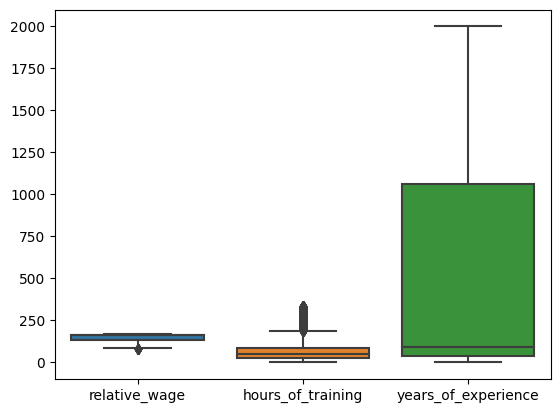

In [464]:
sb.boxplot(data=X_train[['relative_wage', 'hours_of_training', 'years_of_experience']])

<Axes: >

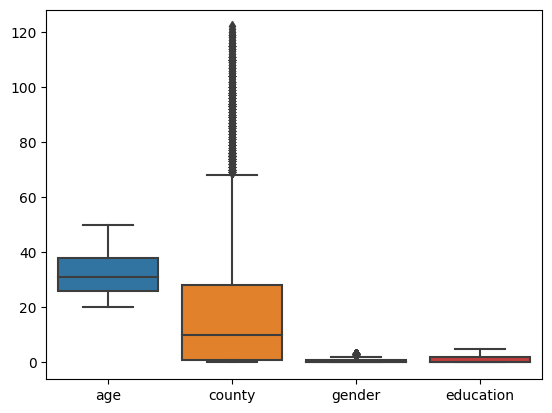

In [465]:
sb.boxplot(data=X_train[['age', 'county', 'gender', 'education']])

<Axes: ylabel='Density'>

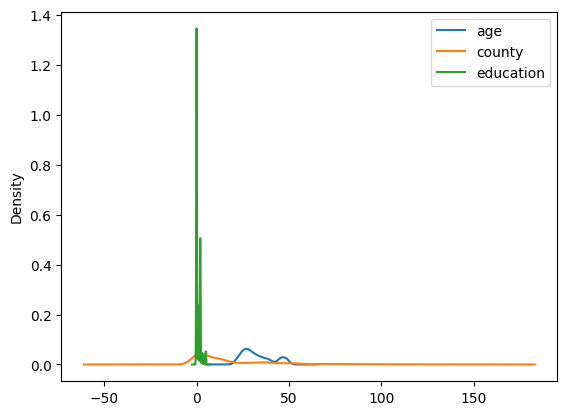

In [470]:
X_train[['age', 'county', 'education']].plot(kind='density')

<Axes: ylabel='Density'>

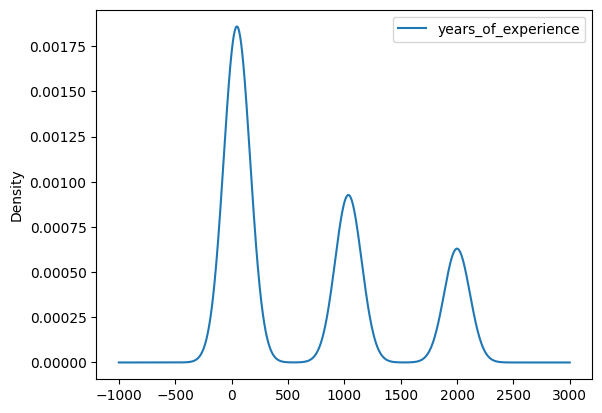

In [471]:
X_train[['years_of_experience']].plot(kind='density')

<h2>Feature Selection Stage</h2>

<h3>First we check for correlation between explanatory variables</h3>

<Axes: >

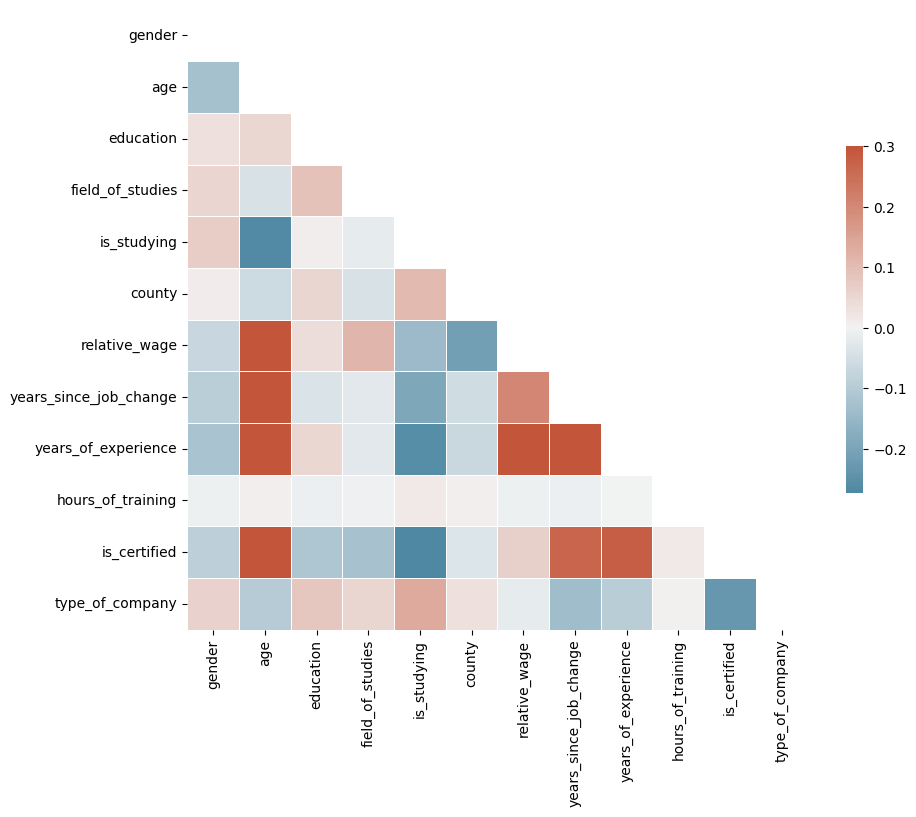

In [398]:
Pearson_corr = X_train.corr(method='pearson')
mask = np.triu(np.ones_like(Pearson_corr, dtype=bool))
f, ax = plt.subplots(figsize=(10,9))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(Pearson_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5})

<Axes: >

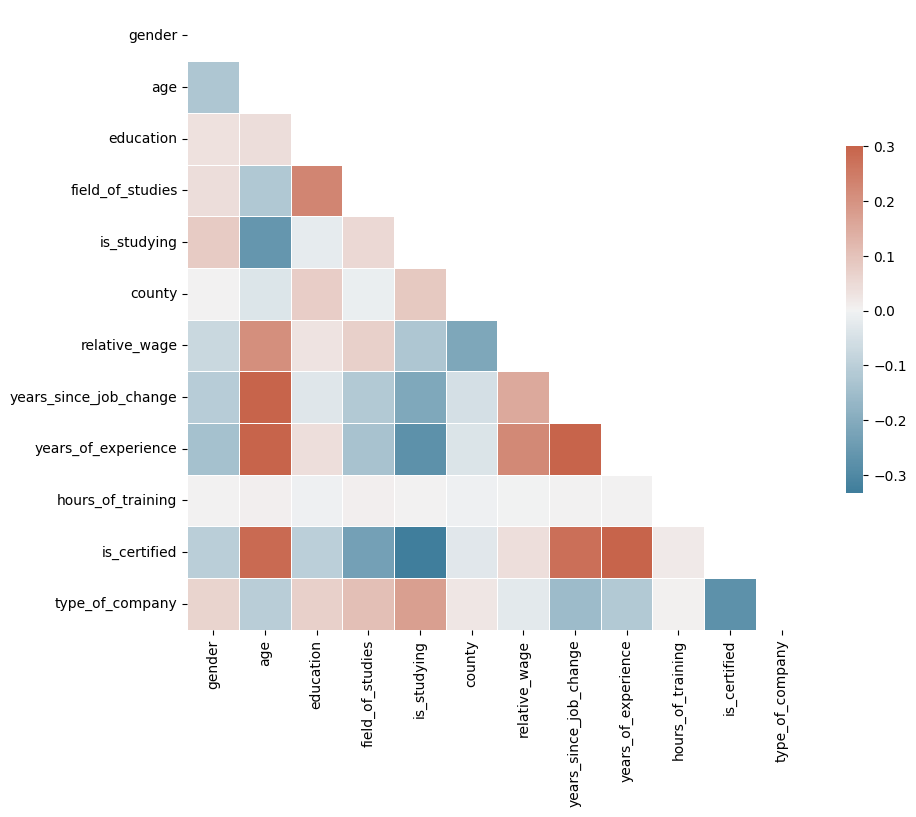

In [399]:
Kendall_corr = X_train.corr(method='kendall')
mask = np.triu(np.ones_like(Kendall_corr, dtype=bool))
f, ax = plt.subplots(figsize=(10,9))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(Kendall_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5})

<Axes: >

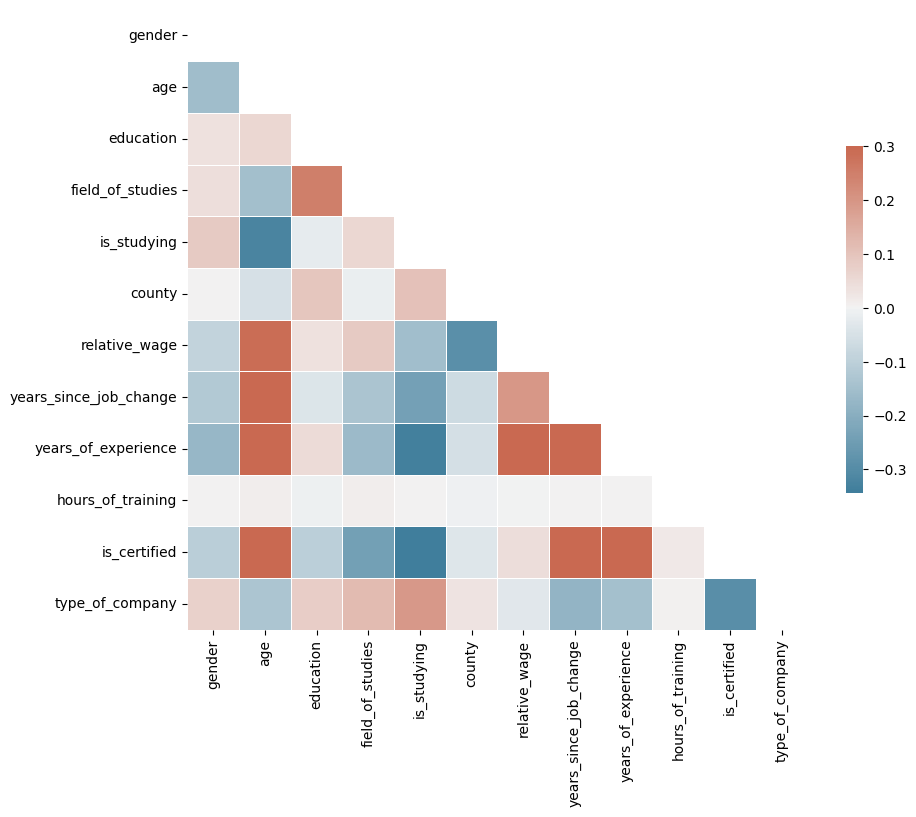

In [400]:
Spearman_corr = X_train.corr(method='spearman')
mask = np.triu(np.ones_like(Spearman_corr, dtype=bool))
f, ax = plt.subplots(figsize=(10,9))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(Spearman_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5})

<h3>Checking Correlation between target and features</h3>

<h3>Next we are looking for correlation between target and features</h3>

In [401]:
X_train.dtypes

gender                      int64
age                         int64
education                   int64
field_of_studies            int64
is_studying                 int64
county                      int64
relative_wage             float64
years_since_job_change      int32
years_of_experience         int32
hours_of_training           int64
is_certified                int64
type_of_company             int64
dtype: object

In [402]:
y_true.dtype

dtype('O')

In [403]:
X_target_measure = X_train.copy()

In [404]:
y_true_measure = pd.DataFrame(y_true)
y_true_measure

,willing_to_change_job
0,No
1,No
2,No
3,No
4,No
...,...
12422,Yes
12423,Yes
12424,No
12425,No


In [405]:
y_true_measure = y_true_measure.eq('Yes').mul(1)

In [406]:
y_true_measure['willing_to_change_job'] = y_true_measure['willing_to_change_job'].astype(float)

In [407]:
y_true_measure.dtypes


willing_to_change_job    float64
dtype: object

<h3>Testing Features</h3>

In [408]:
X_train[['age']].corrwith(X_train['relative_wage'])

age    0.320396
dtype: float64

In [409]:
for feature in X_train:
    print(f'Feature {feature} correlation with y target equals: ' , X_train[[feature]].corrwith(y_true_measure['willing_to_change_job']))

Feature gender correlation with y target equals:  gender    0.056329
dtype: float64
Feature age correlation with y target equals:  age   -0.162516
dtype: float64
Feature education correlation with y target equals:  education   -0.07351
dtype: float64
Feature field_of_studies correlation with y target equals:  field_of_studies   -0.029652
dtype: float64
Feature is_studying correlation with y target equals:  is_studying    0.09507
dtype: float64
Feature county correlation with y target equals:  county   -0.032307
dtype: float64
Feature relative_wage correlation with y target equals:  relative_wage   -0.344828
dtype: float64
Feature years_since_job_change correlation with y target equals:  years_since_job_change   -0.0874
dtype: float64
Feature years_of_experience correlation with y target equals:  years_of_experience   -0.153328
dtype: float64
Feature hours_of_training correlation with y target equals:  hours_of_training   -0.016839
dtype: float64
Feature is_certified correlation with y 

In [410]:
for feature in X_train:
    print(f'Feature {feature} correlation with y target equals: ' , X_train[[feature]].corrwith(y_true_measure['willing_to_change_job'], method='kendall'))

Feature gender correlation with y target equals:  gender    0.066584
dtype: float64
Feature age correlation with y target equals:  age   -0.144512
dtype: float64
Feature education correlation with y target equals:  education   -0.07931
dtype: float64
Feature field_of_studies correlation with y target equals:  field_of_studies   -0.047146
dtype: float64
Feature is_studying correlation with y target equals:  is_studying    0.119279
dtype: float64
Feature county correlation with y target equals:  county   -0.051121
dtype: float64
Feature relative_wage correlation with y target equals:  relative_wage   -0.241335
dtype: float64
Feature years_since_job_change correlation with y target equals:  years_since_job_change   -0.080377
dtype: float64
Feature years_of_experience correlation with y target equals:  years_of_experience   -0.153864
dtype: float64
Feature hours_of_training correlation with y target equals:  hours_of_training   -0.010596
dtype: float64
Feature is_certified correlation with

In [411]:
for feature in X_train:
    print(f'Feature {feature} correlation with y target equals: ' , X_train[[feature]].corrwith(y_true_measure['willing_to_change_job'], method='spearman'))

Feature gender correlation with y target equals:  gender    0.068523
dtype: float64
Feature age correlation with y target equals:  age   -0.173463
dtype: float64
Feature education correlation with y target equals:  education   -0.083762
dtype: float64
Feature field_of_studies correlation with y target equals:  field_of_studies   -0.04886
dtype: float64
Feature is_studying correlation with y target equals:  is_studying    0.122979
dtype: float64
Feature county correlation with y target equals:  county   -0.060224
dtype: float64
Feature relative_wage correlation with y target equals:  relative_wage   -0.282067
dtype: float64
Feature years_since_job_change correlation with y target equals:  years_since_job_change   -0.087985
dtype: float64
Feature years_of_experience correlation with y target equals:  years_of_experience   -0.182008
dtype: float64
Feature hours_of_training correlation with y target equals:  hours_of_training   -0.012923
dtype: float64
Feature is_certified correlation with

<h3>Since all variables are weakly correlated with each other (correlation level below 0.5), we can proceed without removing features. Therefore let's remove potential outliers</h3>

In [412]:
# Removing outliers
from sklearn.preprocessing import PowerTransformer
def remove_skewness(x):
    value = x.skew().values
    for skew in value:
        if skew > 4.0:
            #skewness removal
            pt=PowerTransformer(method='yeo-johnson') 
            X_power=pt.fit_transform(x)
            df1=pd.DataFrame(X_power,columns=X.columns)
            print("Skewness is Detected and will be Removed:")
            return df1
        else:
            print("Skewness not Detected:")
            return x
        
X_train = remove_skewness(X_train)
X_test = remove_skewness(X_test)
X_train.head()

Skewness not Detected:
Skewness not Detected:


,gender,age,education,field_of_studies,is_studying,county,relative_wage,years_since_job_change,years_of_experience,hours_of_training,is_certified,type_of_company
0,0,22,0,0,0,0,162.84,1,20,18,1,0
1,0,27,0,0,0,1,151.34,1,60,24,1,0
2,0,38,0,0,0,2,114.17,1,1030,96,1,1
3,1,47,0,0,0,3,123.55,4,2000,36,1,0
4,0,28,0,0,0,0,162.84,1,50,106,1,0


<h3>As the final step we should standardize data for more relevent results<h3>

In [413]:
from scipy import stats

In [414]:
X_train = stats.zscore(X_train)
X_test = stats.zscore(X_test)

In [415]:
X_test.dtypes

gender                    float64
age                       float64
education                 float64
field_of_studies          float64
is_studying               float64
county                    float64
relative_wage             float64
years_since_job_change    float64
years_of_experience       float64
hours_of_training         float64
is_certified              float64
type_of_company           float64
dtype: object

In [416]:
X_train

,gender,age,education,field_of_studies,is_studying,county,relative_wage,years_since_job_change,years_of_experience,hours_of_training,is_certified,type_of_company
0,-0.609820,-1.328185,-0.680835,-0.453356,-0.544820,-0.799404,0.741406,-0.566235,-0.863447,-0.779442,0.623291,-0.821281
1,-0.609820,-0.715787,-0.680835,-0.453356,-0.544820,-0.755666,0.217798,-0.566235,-0.810388,-0.680106,0.623291,-0.821281
2,-0.609820,0.631489,-0.680835,-0.453356,-0.544820,-0.711928,-1.474594,-0.566235,0.476301,0.511924,0.623291,-0.116540
3,0.910692,1.733806,-0.680835,-0.453356,-0.544820,-0.668190,-1.047512,1.587608,1.762990,-0.481434,0.623291,-0.821281
4,-0.609820,-0.593307,-0.680835,-0.453356,-0.544820,-0.799404,0.741406,-0.566235,-0.823653,0.677484,0.623291,-0.821281
...,...,...,...,...,...,...,...,...,...,...,...,...
12422,-0.609820,-0.715787,0.164225,0.547685,0.888085,1.999836,-2.199905,-1.284183,-0.863447,-0.514546,-1.604387,0.588201
12423,-0.609820,-0.225868,-0.680835,-0.453356,-0.544820,-0.624452,-1.643970,-0.566235,-0.797123,0.843044,0.623291,-0.821281
12424,-0.609820,1.733806,1.854345,-0.453356,-0.544820,-0.799404,0.741406,-1.284183,1.762990,1.306611,0.623291,-0.821281
12425,-0.609820,-1.083226,-0.680835,-0.453356,-0.544820,-0.624452,-1.643970,-1.284183,-0.823653,0.578148,0.623291,-0.821281


<h2>ML model prediction</h2>

In [417]:
from sklearn.linear_model import LogisticRegression

In [418]:
log3 = LogisticRegression(random_state=0, penalty='l2').fit(X_train,y_true)
print('Score: ', round(log3.score(X_train, y_true), 4))
print(log3.coef_, log3.classes_, log3.intercept_)
y_pred = log3.predict(X_test)

Score:  0.7709
[[ 0.05625188 -0.11039514 -0.19960889 -0.01029502  0.04977832 -0.27242185
  -0.78495805  0.08225069  0.04970362 -0.0527006  -0.23224514  0.26399965]] ['No' 'Yes'] [-1.29086599]


In [419]:
from sklearn import svm
vectorMachine = svm.SVC(shrinking=True, probability=False, decision_function_shape='ovo').fit(X_train, y_true)
print(vectorMachine.score(X_train, y_true))
y_pred_SVC = vectorMachine.predict(X_test)
y_pred_SVC

0.7930313028084011


array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [420]:
print('The predicted values are correct in numerical term: ', y_pred)

The predicted values are correct in numerical term:  ['No' 'No' 'Yes' ... 'No' 'No' 'No']


<h3>The best score is achieved by using Support Vector Classifier with rgf kernel. The score is 0.7930. The question is if we can make it even better?</h3>

In [421]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

We can use KBest Selector to determine best features. Since dataset is small we will brute force all possible numbers of features to be fitted.

In [422]:
X_train.dtypes

gender                    float64
age                       float64
education                 float64
field_of_studies          float64
is_studying               float64
county                    float64
relative_wage             float64
years_since_job_change    float64
years_of_experience       float64
hours_of_training         float64
is_certified              float64
type_of_company           float64
dtype: object

In [423]:
X_train.shape

(12427, 12)

In [424]:
best_score = 0
for ks in range(1, 10):
    X_Clustered = SelectKBest(f_classif, k=ks).fit(X_train, y_true)
    cols_idxs = X_Clustered.get_support(indices=True)
    features_clustered = X_train.iloc[:,cols_idxs]

    logC = LogisticRegression(random_state=0, solver='liblinear', penalty='l1').fit(features_clustered,y_true)
    scored = logC.score(features_clustered, y_true)
    print('Score: ', round(logC.score(features_clustered, y_true), 4))
    #y_pred = logC.predict(features_clustered)
    #print(log.coef_, log.classes_, log.intercept_)
    if scored > best_score:
        score = best_score
        print('Best score: ', score, 'Best number of features: ', ks)


Score:  0.7586
Best score:  0 Best number of features:  1
Score:  0.7732
Best score:  0 Best number of features:  2
Score:  0.7711
Best score:  0 Best number of features:  3
Score:  0.7639
Best score:  0 Best number of features:  4
Score:  0.7654
Best score:  0 Best number of features:  5
Score:  0.7652
Best score:  0 Best number of features:  6
Score:  0.7661
Best score:  0 Best number of features:  7
Score:  0.7672
Best score:  0 Best number of features:  8
Score:  0.767
Best score:  0 Best number of features:  9


In [425]:
best_vector_score = 0
for ks in range(1, 10):
    X_Clustered = SelectKBest(f_classif, k=ks).fit(X_train, y_true)
    cols_idxs = X_Clustered.get_support(indices=True)
    features_clustered = X_train.iloc[:,cols_idxs]

    vectorC = svm.SVC(shrinking=True, probability=False, decision_function_shape='ovo').fit(features_clustered,y_true)
    scored = vectorC.score(features_clustered, y_true)
    print('Score: ', round(vectorC.score(features_clustered, y_true), 4))
    #y_pred = logC.predict(features_clustered)
    #print(log.coef_, log.classes_, log.intercept_)
    if scored > best_vector_score:
        score = best_vector_score
        print('Best score: ', score, 'Best number of features: ', ks)

Score:  0.7803
Best score:  0 Best number of features:  1
Score:  0.7789
Best score:  0 Best number of features:  2
Score:  0.7783
Best score:  0 Best number of features:  3
Score:  0.7783
Best score:  0 Best number of features:  4
Score:  0.7801
Best score:  0 Best number of features:  5
Score:  0.78
Best score:  0 Best number of features:  6
Score:  0.7804
Best score:  0 Best number of features:  7
Score:  0.7855
Best score:  0 Best number of features:  8
Score:  0.7889
Best score:  0 Best number of features:  9


<h2>Metrics</h2>

In [427]:
from sklearn.metrics import mean_absolute_percentage_error
n = len(y_pred_SVC)

y_true = pd.DataFrame(y_true)
y_true = y_true.replace({'willing_to_change_job': {'Yes': 1, 'No': 0}})
y_true['willing_to_change_job'] = y_true['willing_to_change_job'].astype(float)
#y_pred['willing_to_change_job'] = y_pred['willing_to_change_job'].astype(float)
print(y_true.dtypes)
y_pred_SVC = pd.DataFrame(y_pred_SVC)
y_pred_SVC[0] = y_pred_SVC[0].replace({'Yes': 1, 'No': 0})

MAPE = mean_absolute_percentage_error(y_true.iloc[:n], y_pred_SVC)
MAPE


willing_to_change_job    float64
dtype: object


486029343098932.2

In [428]:
y_pred_SVC['index'] = y_pred_SVC.index
y_pred_SVC

,0,index
0,0,0
1,0,1
2,1,2
3,0,3
4,0,4
...,...,...
3303,0,3303
3304,0,3304
3305,0,3305
3306,0,3306


In [429]:
y_pred_SVC.to_csv('job_change_prediction.csv', index=False)

In [370]:
import joblib

In [371]:
joblib.dump(vectorMachine, 'SVMClassificationModel.joblib')

['SVMClassificationModel.joblib']